In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('tubi.csv')
df

,Title,Title_URL,Content,Content1,Content2,Content3
0,Farscape,https://tubitv.com/series/300009559/farscape?s...,1999,NaN,TV-14,Sci-Fi · Action · Adventure · Drama
1,The Betrayal 2: Revenge,https://tubitv.com/movies/689161/the-betrayal-...,2022,2 hr 14 min,TV-MA,Action · Crime · Drama
2,Meet the Snows,https://tubitv.com/movies/698767/meet-the-snow...,2022,1 hr 46 min,TV-MA,Action · Drama
3,Til My Casket Drops,https://tubitv.com/movies/699113/til-my-casket...,2022,1 hr 40 min,TV-MA,Crime · Action · Drama
4,McGraw Avenue,https://tubitv.com/series/4893/mcgraw-avenue?s...,2020,NaN,TV-14,Drama · Action
...,...,...,...,...,...,...
297,America's Test Kitchen,https://tubitv.com/series/300005464/america-s-...,2001,NaN,TV-G,Lifestyle · Reality
298,NatureVision TV,https://tubitv.com/series/1665/naturevision-tv...,2018,NaN,TV-G,Music · Reality · Lifestyle · Documentary
299,The Johnny Carson Show,https://tubitv.com/series/300004966/the-johnny...,1953,NaN,TV-PG,Comedy · Lifestyle
300,Jo Frost: Nanny on Tour,https://tubitv.com/series/4057/jo-frost-nanny-...,2016,NaN,TV-PG,Reality · Documentary · Lifestyle


Title         0
Title_URL     0
Content       0
Content1     74
Content2      0
Content3      0
dtype: int64


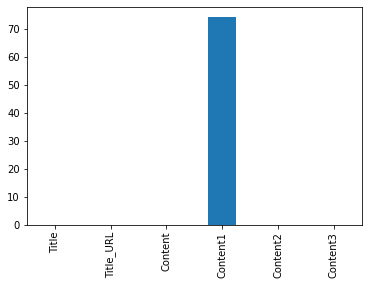

In [3]:
df.isna().sum().plot.bar(x='x',y='y')
print(df.isna().sum())

In [4]:
df['new_Content1']=0
for i in range(0,df.shape[0]):
    try:
        np.isnan(df['Content1'][i])
        
    except TypeError:
        if(df['Content1'][i][2]=='h'):
            ans=int(df['Content1'][i][0])*60
            temp=int(df['Content1'][i][5]+df['Content1'][i][6])
            ans+=temp
        elif(df['Content1'][i][3]=='m'):
            ans+=(int(df['Content1'][i][0]+df['Content1'][i][1]))
        df['new_Content1'][i]=ans

<ipython-input-4-0af0f0cf91bc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_Content1'][i]=ans


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

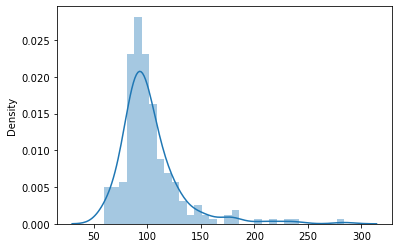

In [5]:
lis=[]
for i in range(0,df.shape[0]):
    if(df['new_Content1'][i]!=0):
        lis.append(df['new_Content1'][i])
sns.distplot(lis)

In [6]:
for i in range(0,df.shape[0]):
    if(df['new_Content1'][i]==0):
        df['new_Content1'][i]=np.median(lis)

<ipython-input-6-50e6d8ec2667>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_Content1'][i]=np.median(lis)


In [7]:
df.drop('Content1',axis=1,inplace=True)

### From the above pdf function we can say that the content1 values is slighlty skewed with a value of 2.54 hence it would be right to use median value to replace the null values

In [8]:
df.drop('Title_URL',axis=1,inplace=True)

## Dropped Title_URL as it is not of any use

In [9]:
for i in range(0,df.shape[0]):
    df['Content'][i]=int(df['Content'][i])

<ipython-input-9-230865503026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'][i]=int(df['Content'][i])


# performing univariate analysis on Content Content2 Content3 and new_Content1

### on new_Content1

## on Content

# outcome:
    78.46% of movies in tubi (according to this dataset) are made between 1931 and 2009 and there are 33 movies that was made in 2022

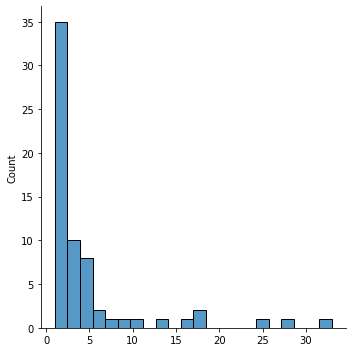

In [10]:
lis=list(df['Content'].value_counts())
sns.displot(lis)

In [28]:
unique=len(df['Content'].unique())
lis=list(df.Content.value_counts().loc[lambda x:x<2].index)
print(sorted(lis))
lis2=sorted(list(df.Content.value_counts().loc[lambda x:x<5].index))

print(f'percentage of year of release with a frequence of less than 5 make up { len(lis2)*100/unique} and such movies are made between {lis2[0]} and {lis2[len(lis2)-1]}')

[1931, 1937, 1943, 1945, 1951, 1952, 1953, 1955, 1962, 1966, 1967, 1969, 1978, 1981, 1982, 1994, 1995, 1997, 1998, 1999]
percentage of year of release with a frequence of less than 5 make up 78.46153846153847 and such movies are made between 1931 and 2009


## On content2

# outcomes:
    It was found that most of the movies are rated TV-MA which means that it contained elements which are only suitable for the mature audiance.
    Further the categorical features are converted using frequency encoding technique as there is no redundancy in the frequency of each value

TV-Y7       0.003311
TV-Y7_FV    0.006623
G           0.006623
TV-Y        0.026490
PG-13       0.036424
PG          0.052980
R           0.082781
TV-G        0.092715
TV-PG       0.185430
TV-14       0.221854
TV-MA       0.284768
Name: Content2, dtype: float64


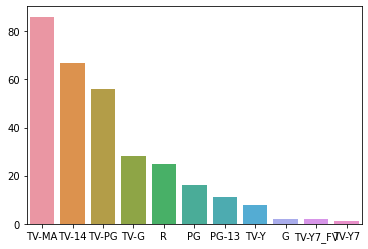

In [12]:
lis_con=['TV-MA','TV-14','TV-PG','TV-G','R','PG','PG-13','TV-Y','G','TV-Y7_FV','TV-Y7']

sns.barplot(x=lis_con,y=list(df['Content2'].value_counts()))
print(df['Content2'].value_counts(normalize=True,ascending=True))
# print(f'percentage of occurance of each value = {}')

g tv-y7-fv tv-y7 and tv-y are categoized as kids as they almost imply the same thing and they are also smaller in number

In [13]:
for i in list(df[df['Content2']=='G'].index)+list(df[df['Content2']=='TV-Y7'].index)+list(df[df['Content2']=='TV-Y7_FV'].index)+list(df[df['Content2']=='TV-Y'].index):
    df.at[i,'Content2']='Others'

In [14]:

df

,Title,Content,Content2,Content3,new_Content1
0,Farscape,1999,TV-14,Sci-Fi · Action · Adventure · Drama,96
1,The Betrayal 2: Revenge,2022,TV-MA,Action · Crime · Drama,134
2,Meet the Snows,2022,TV-MA,Action · Drama,106
3,Til My Casket Drops,2022,TV-MA,Crime · Action · Drama,100
4,McGraw Avenue,2020,TV-14,Drama · Action,96
...,...,...,...,...,...
297,America's Test Kitchen,2001,TV-G,Lifestyle · Reality,96
298,NatureVision TV,2018,TV-G,Music · Reality · Lifestyle · Documentary,96
299,The Johnny Carson Show,1953,TV-PG,Comedy · Lifestyle,96
300,Jo Frost: Nanny on Tour,2016,TV-PG,Reality · Documentary · Lifestyle,96


In [15]:
df_temp=df['Content2'].value_counts().to_frame()
lis=list(df_temp.index)
lis2=list(df_temp['Content2'])

In [16]:
for i in lis:
    for j in list(df[df['Content2']==i].index):
        df.at[j,'Content2']=lis2[lis.index(i)]

## On content3

Outcomes:
    since many genres are given in overlapping fashion(multiple genres in the same entry) in the dataset,they are converted to a dictonary to get all the unique values of genres
    
    It was therby found that Drama and comedy was the 2 of the most occuring genres

In [17]:
def get_all_genre():
    dicto={}
    dot=df['Content3'][0][7]
    for ind in range(0,df.shape[0]):
        stri=df['Content3'][ind].replace('\xa0',' ')
        stri=stri.replace(dot,' ')
        for i in stri.split():
            try:
                dicto[i]+=1
            except KeyError:
                dicto[i]=1
    return dicto

In [18]:
dicto=get_all_genre()
del dicto['Kids']
del dicto['&']

In [19]:
da=pd.DataFrame.from_dict(dicto,orient='index').T

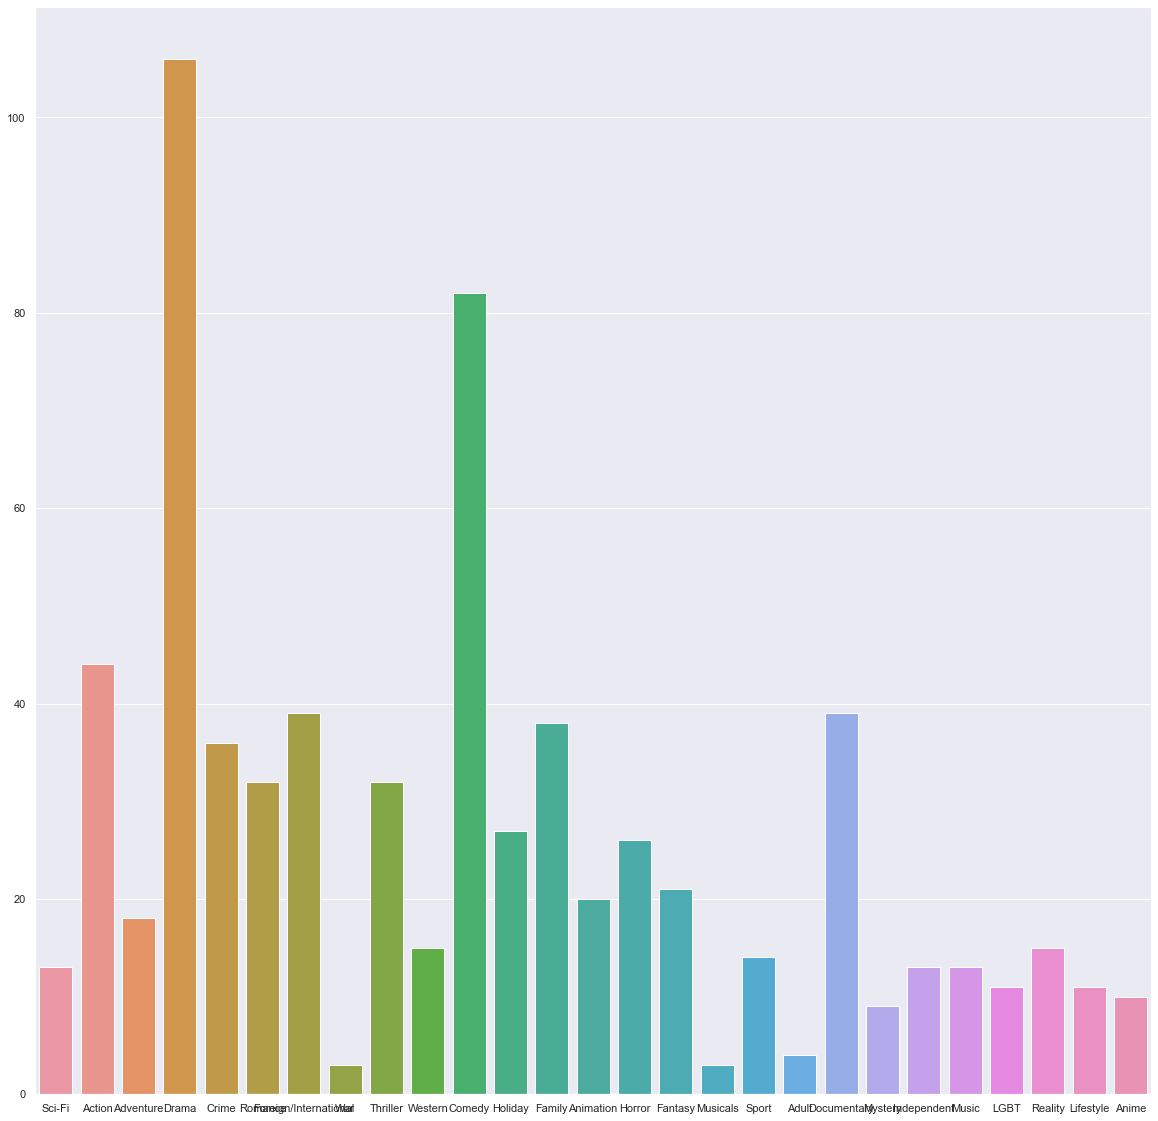

In [22]:
sns.barplot(data=da)
sns.set(rc = {'figure.figsize':(20,20)})

# Conclusions:
    From this dataset we can make the following statements regarding tubi:
        The movies are mostly of short with an average duration of 101 minutes
        Tubi is a good option for old movie lovers as it consists of mainly old (from 1930 to 2009) movies as they make up 78% of the total dataset.
        Tubi might not be the good option for immature audiance as 28% of the movies are rated TV-MA and 22 percent arerated TV-MA 
        Drama and Comedy is the genre of most of the movies while musicals and Adult are the least
        